In [2]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# constants
lambda_laser = 532e-9 # wavelength of the laser in meters
thickness = 0.6e-2 # thickness in meters

def N_fit(theta_in,n):
    """Function to fit the refractive index data."""
    theta_in_rad = np.deg2rad(theta_in)
    return ((2*thickness)/lambda_laser) * ( (n**2)/(np.sqrt(n**2-np.sin(theta_in_rad)**2)) - n - np.cos(theta_in_rad) + 1 - (np.sin(theta_in_rad)**(3/2))/n)

In [5]:
# data
theta_measured = np.array([2, 4, 6, 8, 10, 12, 14, 16, 18, 20]) # measured angles in degrees
N_measured = np.array([4,7,10,21,32,24,22,23,27,26]) # measured N values


In [24]:
# data manier 2
theta_measured = np.array([2, 4, 6, 8, 10, 12, 14, 16, 18, 20]) # measured angles in degrees
N_measured = np.array([4,11,21,42,74,98,120,146,173,199]) # measured N values

In [3]:
theta_measured = np.array([2,4,6,8,10,12,14]) # measured angles in degrees
N_measured = np.array([10,17,25,37,48,62,53]) # measured N values

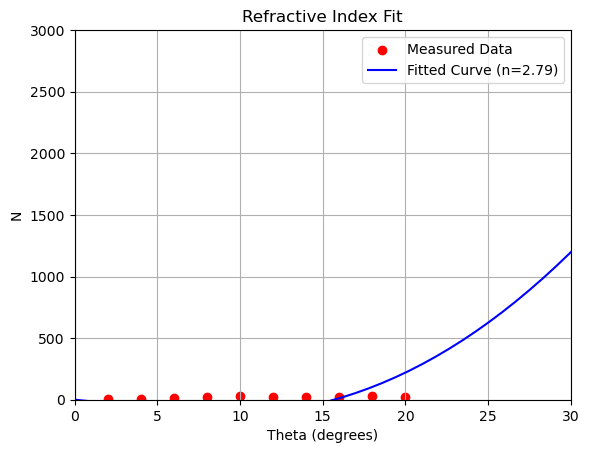

In [17]:
# fit the data
popt, pcov = curve_fit(N_fit, theta_measured, N_measured , p0=[1.5])
n_fit = popt
theta_fit = np.linspace(0,80,100)
n_line = N_fit(theta_fit, *n_fit)

# plotting
plt.figure(0)
plt.scatter(theta_measured, N_measured, label='Measured Data', color='red')
plt.plot(theta_fit, n_line, label=f'Fitted Curve (n={n_fit[0]:.2f})', color='blue')
plt.xlabel('Theta (degrees)')
plt.ylabel('N')
plt.title('Refractive Index Fit')
plt.legend()
plt.grid()
plt.xlim(0,30)
plt.ylim(0,3000)

plt.show()